In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
col_names = ['age', 'workclass', 'fnlwgt','education', 'education-num', 
'marital-status', 'occupation', 'relationship', 'race', 'sex',
'capital-gain','capital-loss', 'hours-per-week','native-country', 'income']

In [31]:
feature_cols = ['age','capital-gain', 'capital-loss', 'hours-per-week', 
'sex','race', 'hours-per-week', 'education']

In [17]:
df = pd.read_csv('adult.data.csv', header=None, names=col_names)

In [19]:
for c in df.select_dtypes(include=['object']).columns:
    df[c] = df[c].str.strip()

In [21]:
print(df.head())

   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0             

In [27]:
print(df['income'].value_counts(normalize=True))

income
<=50K    0.75919
>50K     0.24081
Name: proportion, dtype: float64


In [33]:
X = pd.get_dummies(df[feature_cols], drop_first=True)

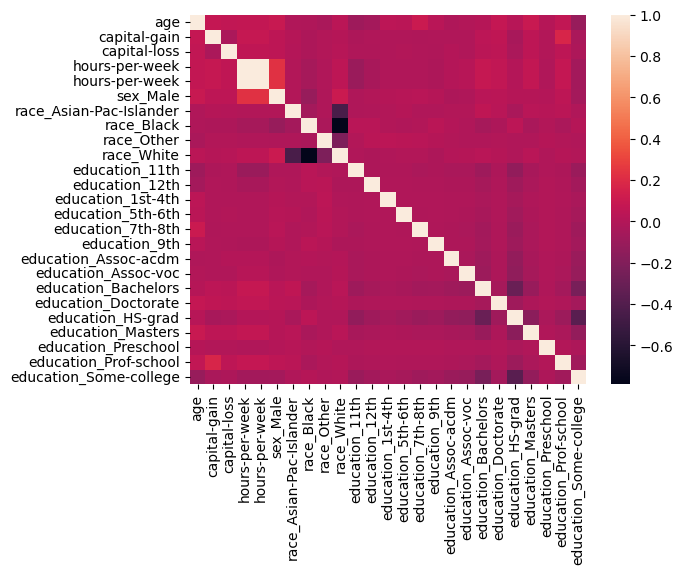

<Figure size 640x480 with 0 Axes>

In [35]:
correlation_matrix = X.corr()
plt.figure()
sns.heatmap(correlation_matrix)
plt.show()
plt.clf()

In [37]:
y = np.where(df['income'] == '<=50K', 0, 1)

In [39]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [41]:
log_reg = LogisticRegression(C=0.05, penalty='l1', solver='liblinear')

In [45]:
log_reg.fit(x_train, y_train)

LogisticRegression(C=0.05, penalty='l1', solver='liblinear')

In [47]:
y_pred = log_reg.predict(x_test)

In [51]:
intercept = log_reg.intercept_[0]
coefficient = log_reg.coef_

In [53]:
print(f'Model Parameters, Intercept: {intercept}')
print(f'Model Parameters, Coefficient: {coefficient}')

Model Parameters, Intercept: -5.5117884050952926
Model Parameters, Coefficient: [[ 3.62524208e-02  3.14512919e-04  6.65876708e-04  1.71883156e-02
   1.44339133e-02  1.02620723e+00  0.00000000e+00 -3.82677596e-01
   0.00000000e+00  5.39922648e-02 -5.82217588e-01  0.00000000e+00
   0.00000000e+00 -4.05868589e-01 -8.95778618e-01 -5.04636127e-01
   5.65812156e-01  5.44635655e-01  1.27612857e+00  1.79407384e+00
   0.00000000e+00  1.59707025e+00  0.00000000e+00  1.81840645e+00
   3.78571290e-01]]


In [55]:
confusion_m= confusion_matrix(y_test, y_pred)
accuracy_score = accuracy_score(y_test, y_pred)

In [59]:
print(f'Confusion Matrix on test set: ')
print(confusion_m)
print(f'Accuracy Score on test set: {accuracy_score}')

Confusion Matrix on test set: 
[[4781  245]
 [ 879  608]]
Accuracy Score on test set: 0.8274220789190849


In [67]:
coef_df = pd.DataFrame(zip(x_train.columns, log_reg.coef_[0]), columns=['var', 'coef']).sort_values('coef')

In [69]:
coef_df = coef_df[coef_df.coef.abs()>0].sort_values('coef')

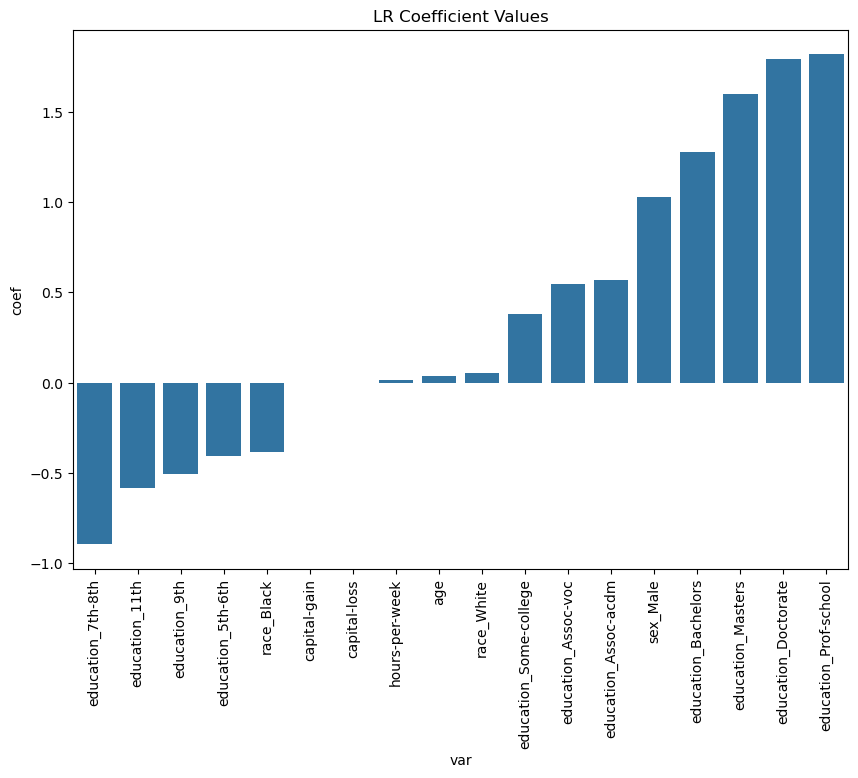

<Figure size 640x480 with 0 Axes>

In [73]:
plt.figure(figsize=(10,7))
sns.barplot(data=coef_df, x='var', y='coef')
plt.xticks(rotation=90)
plt.title('LR Coefficient Values')
plt.show()
plt.clf()

In [79]:
y_pred_prob = log_reg.predict_proba(x_test)
roc_auc = roc_auc_score(y_test, y_pred_prob[:,1])

In [81]:
print(f'ROC AUC score: {roc_auc}')

ROC AUC score: 0.8455084669336129


In [83]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])

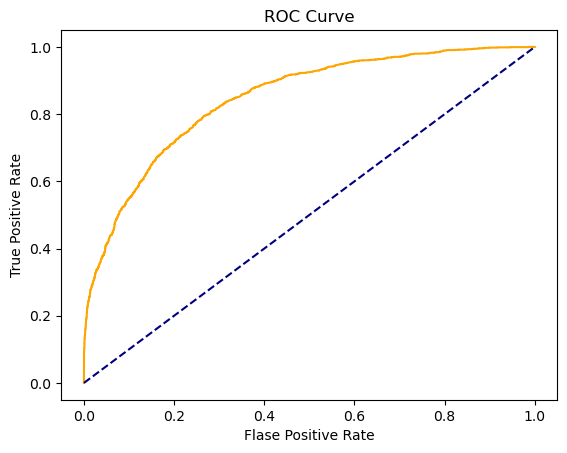

<Figure size 640x480 with 0 Axes>

In [85]:
plt.figure()
plt.plot(fpr, tpr, color='orange')
plt.xlabel('Flase Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0,1],[0,1], color = 'navy', linestyle='--')
plt.title('ROC Curve')
plt.show()
plt.clf()